# Part II - PISA Data Anaysis



## by Mandieng Bot

## Introduction
> PISA is a worldwide study by OECD in member and non-member nations intended to evaluate educational systems by measuring 15-year-old students scholastic performance on mathematics, science, and reading.

>The purpose of this Analysis is to explore how factors like students behaivior, gender and interests affects the  student's performance and Problem solving ability
Other questions this analysis will aim to answer is wether there are differences in achievemets based on gender and student's attitude (drive)

## Preliminary Wrangling

My Data cleaning process can be found [here](https://github.com/mandeebot/new_new/blob/main/pisa-data-cleaning-note.ipynb).

This dataset contains information from 485,490 students and 646 features.
Due low computing resources and the size of the dataset,moving further i will further categorize and streamline the dataset into categorise for easy analysis.
These will be the features that will be used for my analysis, as i believe they will help me in answering the questions raised.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
#warnings.simplefilter("ignore")

sb.set_style('whitegrid')

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('fdata_cleaned')

#change datatypes
data.gender = data.gender.astype('category')
data.country = data.country.astype('category')
data.birthYear = data.birthYear.astype('category')

# fix inconsistent formatting in country name
data.country = data.country.apply(lambda x: x.strip())

# calculate an academic average for each student
data['academic_avg'] = (data.MathScore + data.ReadScore + data.ScienceScore)/3


## Distribution of Grades Feature

> We start off our univariate analysis by examig the distributio of the grades feature
 by identifying the most common sample demographics and how can we utilise this for further analysis?

/home/mandeebot/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


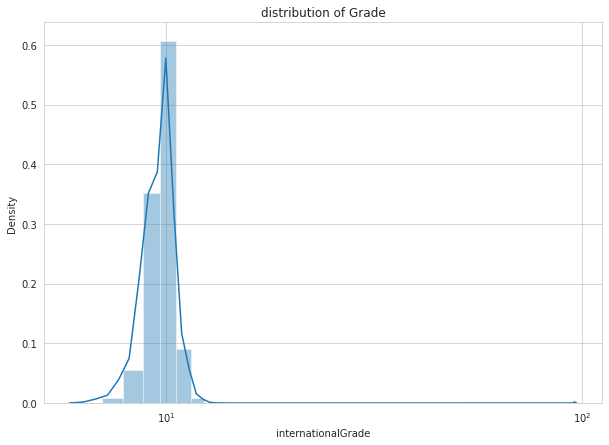

In [3]:
#applying transforms by putting a log function 
plt.figure(figsize=(10,7))
sb.distplot(data['internationalGrade'],bins=100);
plt.xscale('log')
plt.title('distribution of Grade');
#plt.savefig('grade.png')

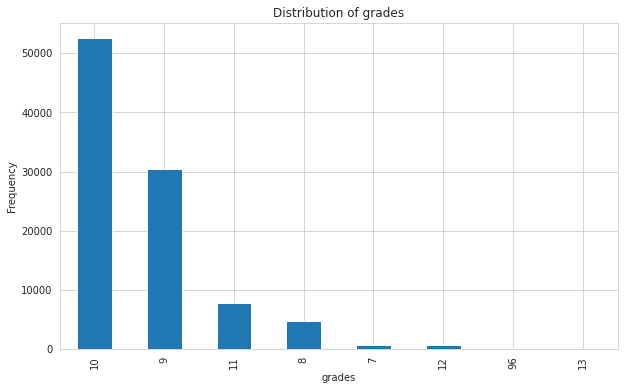

In [4]:
#plot distribution of international grade
plt.figure(figsize = (10,6))
data['internationalGrade'].value_counts().plot(kind='bar')
plt.title("Distribution of grades")
plt.xlabel("grades")
plt.ylabel("Frequency");

looking at the distribution we see a spike in the frequency of the grades that fall within 9 to 11, which goes to show that a large portion of the students grades fall withi 9 to 11, with 10 being the most frequent grade from our sample



## Distribution of Read, Maths and Science performance core by Gender
>Now lets analyse the distribution of the student's performances in Reading, Maths and Sciences by their gender.

<AxesSubplot:xlabel='gender', ylabel='ScienceScore'>

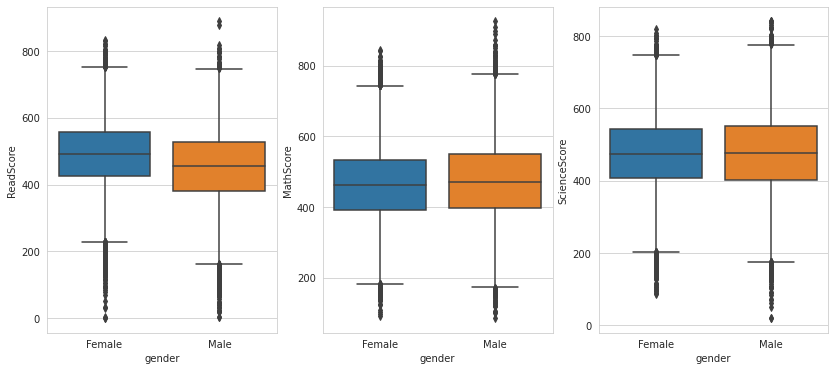

In [5]:
# graph the distribution of math performance according to gender

plt.figure(figsize=(14,6))
plt.subplot(131)
sb.boxplot(data=data, y='ReadScore', x='gender')
plt.subplot(132)
sb.boxplot(data=data, y='MathScore', x='gender')
plt.subplot(133)
sb.boxplot(data=data, y='ScienceScore', x='gender')

#fig.tight_layout()

All three evaluations of scores of Maths,Reading and Science are somewhat Normally distributed with centers around 400 to 600.
Looking at the plot of students performances above; in terms of reading we can see that females tend to score higher in ranges than their male counters

A look at the maths score tells a different story; here we see that males tend to perform better than females lastly in sciences, the differences are not that sigificant

## Relationship between features
Now we explore the distributions of the scores in student's motivation(drive), interest, problem solving skills and behaivior(extraculular activites)

/home/mandeebot/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mandeebot/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


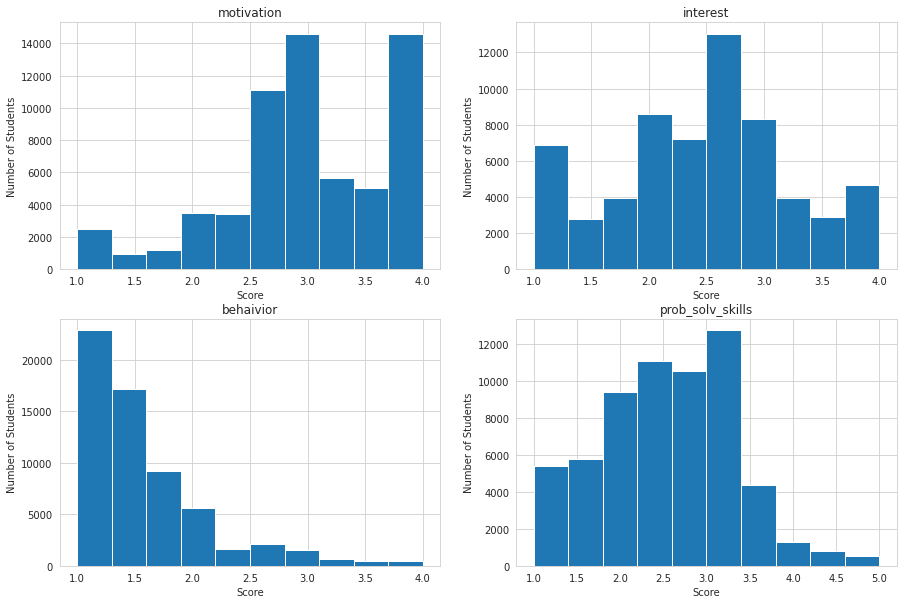

In [6]:
#Subsection drive
st_drive=['motivation','interest','behaivior','prob_solv_skills']

fig, ax= plt.subplots(nrows=2,ncols=2,figsize=[15,10])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/5,1/4,1/5]

ax=ax.flatten()
i=0

for feature in st_drive:
    #bins = np.arange(min(data[feature]), max(data[feature]) + binsizes[i], binsizes[i])
    ax[i].hist(data=data, x=feature)#,bins=bins)
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(feature)
    i+=1

under the motivation feature, it looks like the graph is slighly skewed to the left with spikes at point

Interest feature seems a bit bimodal, but it indicates a general interest in maths activities like

behavior is positively skewed, highlighting that most students do not take extra actions towards Mathematics such as taking about math with friends, play chess, or computer programming

## Correlation within features
> Which relatioships are amongst the variables of interest are the strongest? we start off by checking out for correlation between the features to explore which of the relationships are the strongest, which relatioships are the weakest etc


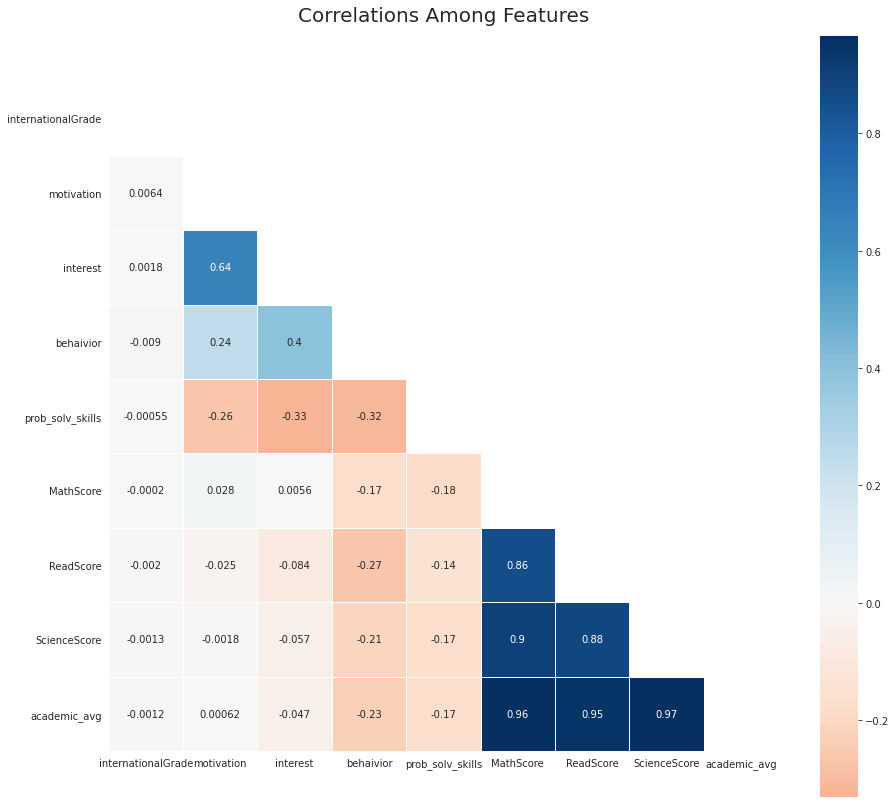

In [7]:
data = data[['country','birthYear','gender','internationalGrade','motivation','interest','behaivior',
             'prob_solv_skills','MathScore','ReadScore','ScienceScore','academic_avg']]

## heatmeap to see the correlation between features. 
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,14))
sb.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

we can point out from the plot correlations that are strong, the strogest correlation is between interest and motivation we have a fairly strong relatioship between interest and behaivior too, as well as behaivior and motivation. we can observe some abormally strong correlation with the performance scores(maths, science,read) thats a feature worth investigating



## Summary of Findings

>In this exploration, I found that the top performing students were majority males, they showed more interest in Maths and Sciences, while the female only edge males in reading.

>We can also see a pattern among the student drive towards math in the top performing students. As the top pecentile of students increases, the male students' average scores for motivation, behavior, interest, was higher than the female students' average scores under these categories.

>A point worth of mention is that given the high scores of males we also noticed females edged out males in terms of problem solving skills, which begs further questions like since males scored higher on the other performance indexes, why is't this translated into their problem solving skills or ability?

>In conclusion, this Analysis requires further investigations, especially on the relationships between the variables



In [ ]:
!jupyter nbconvert Part_II_Pisa_Analysis.ipynb --to slides --post serve --no-input 

[NbConvertApp] Converting notebook Part_II_Pisa_Analysis.ipynb to slides
[NbConvertApp] Writing 460705 bytes to Part_II_Pisa_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Pisa_Analysis.slides.html
Use Control-C to stop this server


In [ ]:
#conda install nbconvert
